In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true;
function code_toggle() {
if (code_show){
$('div.input').hide();
} else {
$('div.input').show();
}
code_show = !code_show}
$( document ).ready(code_toggle);
</script>The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

### Time Series and Basemap Visualization on Chicago Crime Data

The Chicago Crime Data reflects the crime incidents that occured in the city of Chicago during 2016 and 2017. The data is provided in the `chicago_crime_data_v3.csv` file. For each crime incident, there is information regarding the case ID, crime location, description, primary crime type ID, coordinates of the crime etc. To identify the primary crime type (denoted by the `Primary type` variable), the `primary_type_ID.csv` file is provided which maps the primary crime type to their corresponding ID.

For this problem, the goal is to identify the crime types that have occurred more than 10,000 times during the years 2016 and 2017. For this,

1. Import the CSV files as dataframes using pandas.

2. Sort the crime data file by crime ID and merge the two files by `Primary Type ID` variable. 

3. Identify the crime types that have a frequency >10,000 and list them as `High Frequency Crime Types`. Provide a timeseries plot for all `High Frequency Crime Types`. For this, compute the number of crimes that occur per each crime type per month (2016 Jan - 2017 Dec). Use the `series.plot` method in Pandas for Series objects. 

4. Using the code provided below, plot all the crimes that come under `High Frequency Crime Types` on a map of Chicago. For this, use the location information provided in the data. For any crimes with missing location coordinates, sort the data by ascending `Date` and use forward fill.  

(Make sure that each data point must be plotted as a transparent circular dots with a markersize of atleast 20 and alpha set to atmost 0.5 (transparency))

_Installation Notes_: You will need the `basemap` package. You can get that using:
```script
conda install basemap
```

Due to some bug in the way `conda` maintains environmental variables, the following import statement might not work:
```python
from mpl_toolkits.basemap import Basemap
```

If it does not work on your computer, try the following:
```python
import os,conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap
```

In [6]:
import pandas as pd
from datetime import datetime

#Loading csv files and merging into single dataframe
chicago_crime_data=pd.read_csv('chicago_crime_data_v3.csv')
chicago_crime_data.head()
primary_type_id=pd.read_csv('primary_type_id.csv')
primary_type_id.head()
merged = pd.merge(chicago_crime_data, primary_type_id, how='outer', left_on='Primary Type ID', right_on='Primary Type ID')

In [7]:
#Selecting high frequency crimes (>10000)
highfreq=merged.groupby('Primary Type').size()
highfreq=highfreq[highfreq.values>10000]
highfreq_crimes_list=highfreq.index.tolist()

In [8]:
#Keep only high frequency crimes in dataframe
hf_crimes=merged.loc[merged['Primary Type'].isin(highfreq_crimes_list)]
#Formatting date in dataframe
hf_crimes['Date'] = pd.to_datetime(hf_crimes['Date']).apply(lambda x:x.date().strftime('%Y-%m'))
#Grouping by two columns
hf_crime_series=hf_crimes.groupby(['Date', 'Primary Type']).size()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


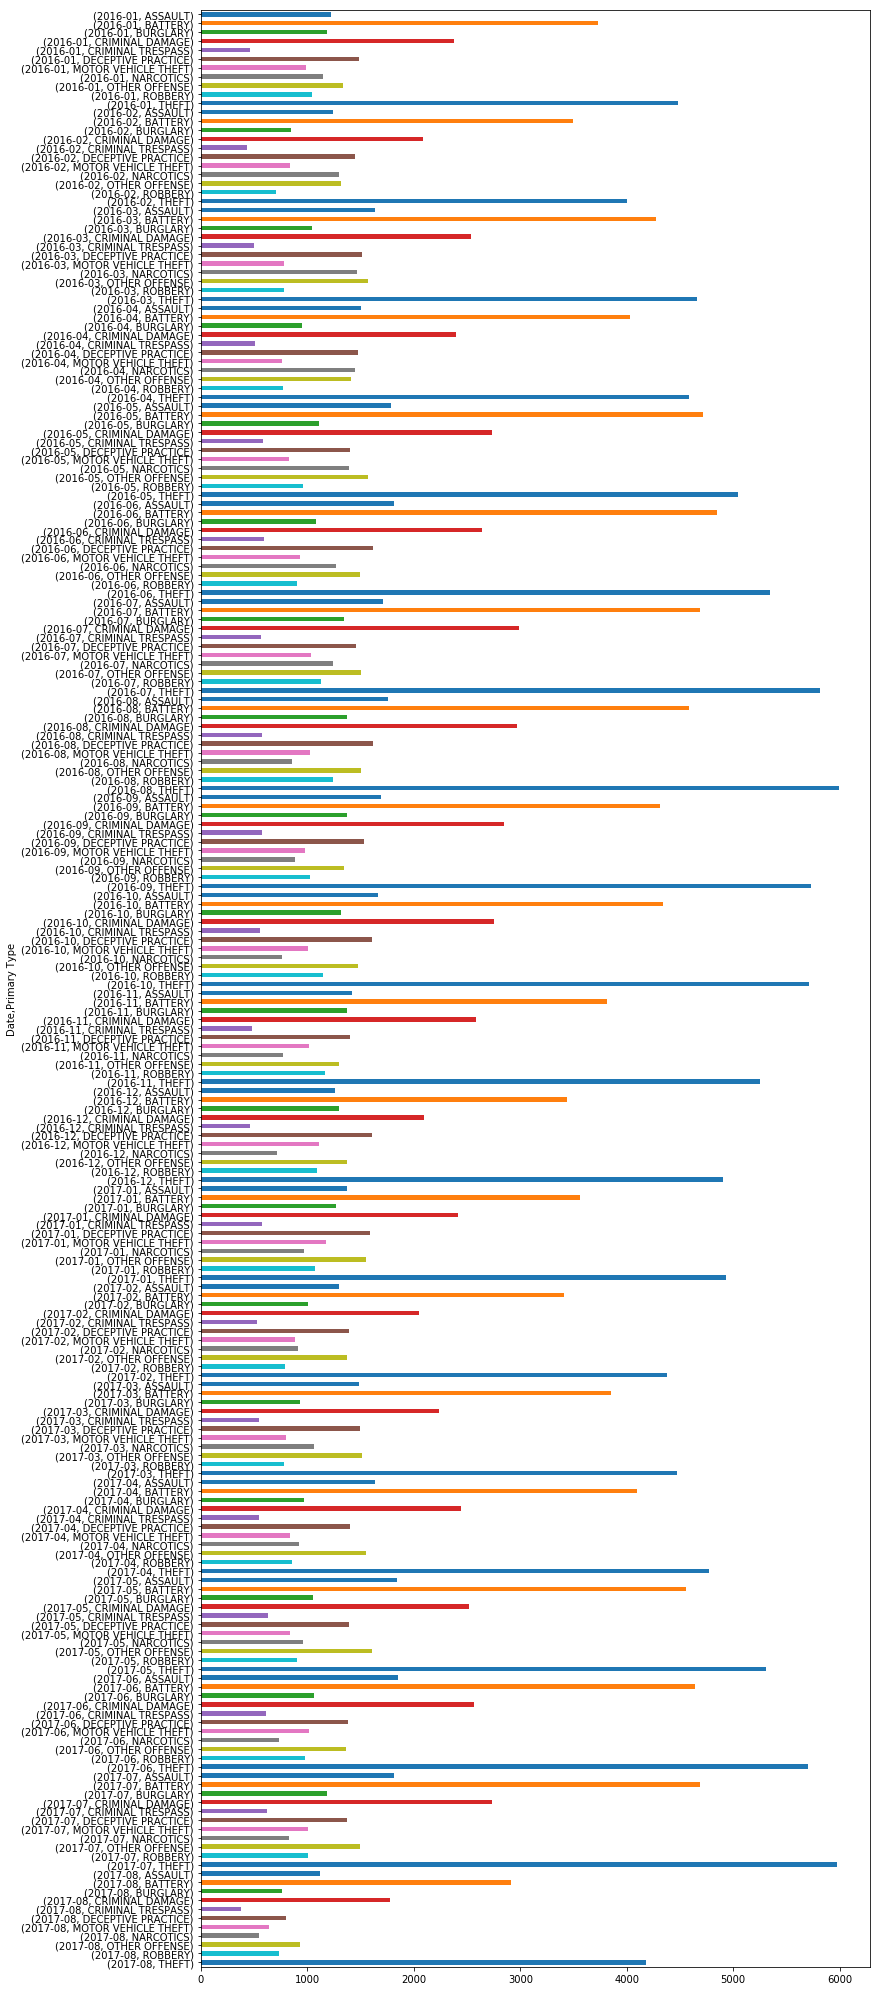

In [9]:
#Plot Series object
hf_crime_series.plot(kind='barh',figsize=(12,36)).invert_yaxis()

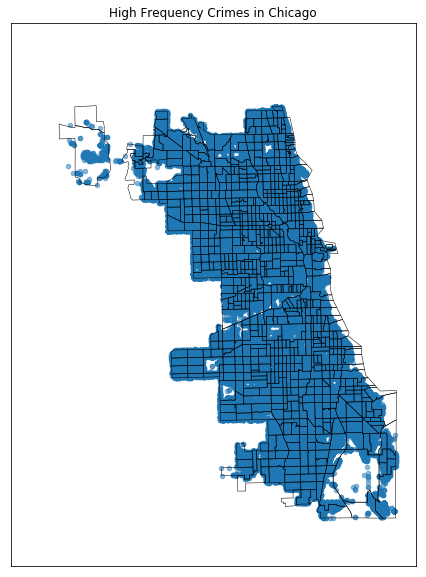

In [11]:
#Forward filling data based on sorted values date
hf_crimes = hf_crimes.sort_values(['Date']).ffill()

from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=[16,10])
m = Basemap(projection='merc',llcrnrlat=41.60,urcrnrlat=42.10,\
        llcrnrlon=-88.0,urcrnrlon=-87.50,lat_ts=20,resolution='c')
m.readshapefile('./geo_export_0e3da441-8fe8-4e11-9ca0-42ef75cab68e','chicago')
longitudes=hf_crimes['Longitude'].tolist()
latitudes=hf_crimes['Latitude'].tolist()
x,y = m(longitudes,latitudes)
plt.scatter(x,y,alpha=0.5,s=20)
plt.title("High Frequency Crimes in Chicago")
plt.show()